In [88]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# QBOi Tigramite notebook.

- Install Tigramite and dependencies
- Load data from local dir
- Run Causal Effect Network analysis on QBOi data


## Install dependencies and Tigramite
Use pip install to load cython and ace, then use pip install git+... to load tigramite directly from the github repo.

In [89]:
# Imports required python packages
import numpy
import numpy.ma as ma
import matplotlib
from matplotlib import pyplot as plt
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from tigramite.models import LinearMediation, Prediction

import numpy as np
import pandas as pd
import netCDF4
from scipy import signal
 
import iris
#import iris.plot as iplt


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline     

Read data in to Pandas dataframe

In [2]:
ERA = "/home/tyrrell/research/qbo/qboi/cen_data/erai_mon.csv"
CAM_r1 = "/home/tyrrell/research/qbo/qboi/cen_data/CAM_QBOiExp1_r1i1p1_mon.csv"
CAM_r2 = "/home/tyrrell/research/qbo/qboi/cen_data/CAM_QBOiExp1_r2i1p1_mon.csv"
CAM_r3 = "/home/tyrrell/research/qbo/qboi/cen_data/CAM_QBOiExp1_r3i1p1_mon.csv"
CCCmaCMAM_r1 = "/home/tyrrell/research/qbo/qboi/cen_data/CCCmaCMAM_QBOiExp1_r1i1p1_mon.csv"
CCCmaCMAM_r2 = "/home/tyrrell/research/qbo/qboi/cen_data/CCCmaCMAM_QBOiExp1_r2i1p1_mon.csv"
CCCmaCMAM_r3 = "/home/tyrrell/research/qbo/qboi/cen_data/CCCmaCMAM_QBOiExp1_r3i1p1_mon.csv"
ISAC_CNRECHAM5sh = "/home/tyrrell/research/qbo/qboi/cen_data/ISAC-CNRECHAM5sh_QBOiExp1_r1i1p1_mon.csv"
#MIROCMIROC_AGCM_r1 = "/home/tyrrell/research/qbo/qboi/cen_data/MIROCMIROC-AGCM_QBOiExp1_r1i1p1_mon.csv"
MIROCMIROC_AGCM_r2 = "/home/tyrrell/research/qbo/qboi/cen_data/MIROCMIROC-AGCM_QBOiExp1_r2i1p1_mon.csv"
MIROCMIROC_AGCM_r3 = "/home/tyrrell/research/qbo/qboi/cen_data/MIROCMIROC-AGCM_QBOiExp1_r3i1p1_mon.csv"
MIROCMIROC_ESM_r1 = "/home/tyrrell/research/qbo/qboi/cen_data/MIROCMIROC-ESM_QBOiExp1_r1i1p1_mon.csv"
MIROCMIROC_ESM_r2 = "/home/tyrrell/research/qbo/qboi/cen_data/MIROCMIROC-ESM_QBOiExp1_r2i1p1_mon.csv"
MIROCMIROC_ESM_r3 = "/home/tyrrell/research/qbo/qboi/cen_data/MIROCMIROC-ESM_QBOiExp1_r3i1p1_mon.csv"
MOHCUMGA7_r2 = "/home/tyrrell/research/qbo/qboi/cen_data/MOHCUMGA7_QBOiExp1_r2i1p1_mon.csv"
MOHCUMGA7_r3 = "/home/tyrrell/research/qbo/qboi/cen_data/MOHCUMGA7_QBOiExp1_r3i1p1_mon.csv"
MOHCUMGA7_r4 = "/home/tyrrell/research/qbo/qboi/cen_data/MOHCUMGA7_QBOiExp1_r4i1p1_mon.csv"
MRIMRI_ESM2_r1 = "/home/tyrrell/research/qbo/qboi/cen_data/MRIMRI-ESM2_QBOiExp1_r1i1p1_mon.csv"
WACCM_r1 = "/home/tyrrell/research/qbo/qboi/cen_data/WACCM_QBOiExp1_r1i1p1_mon.csv"
WACCM_r2 = "/home/tyrrell/research/qbo/qboi/cen_data/WACCM_QBOiExp1_r2i1p1_mon.csv"
WACCM_r3 = "/home/tyrrell/research/qbo/qboi/cen_data/WACCM_QBOiExp1_r3i1p1_mon.csv"
YonseiHadGEM2_AC = "/home/tyrrell/research/qbo/qboi/cen_data/YonseiHadGEM2-AC_QBOiExp1_r1i1p2_mon.csv"
YonseiHadGEM2_A = "/home/tyrrell/research/qbo/qboi/cen_data/YonseiHadGEM2-A_QBOiExp1_r1i1p1_mon.csv"

era = pd.read_csv(ERA,index_col=0)[0:432]
cam_r1 = pd.read_csv(CAM_r1,index_col=0)
cam_r2 = pd.read_csv(CAM_r2,index_col=0)[0:-3]
cam_r3 = pd.read_csv(CAM_r3,index_col=0)
cccmacmam_r1  = pd.read_csv(CCCmaCMAM_r1,index_col=0)
cccmacmam_r2  = pd.read_csv(CCCmaCMAM_r2,index_col=0)
cccmacmam_r3  = pd.read_csv(CCCmaCMAM_r3,index_col=0)
isac_cnrecham5sh = pd.read_csv(ISAC_CNRECHAM5sh,index_col=0)
#mirocmiroc_agcm_r1 = pd.read_csv(MIROCMIROC_AGCM_r1,index_col=0)
mirocmiroc_agcm_r2 = pd.read_csv(MIROCMIROC_AGCM_r2,index_col=0)
mirocmiroc_agcm_r3 = pd.read_csv(MIROCMIROC_AGCM_r3,index_col=0)
mirocmiroc_esm_r1 = pd.read_csv(MIROCMIROC_ESM_r1,index_col=0)
mirocmiroc_esm_r2 = pd.read_csv(MIROCMIROC_ESM_r2,index_col=0)
mirocmiroc_esm_r3 = pd.read_csv(MIROCMIROC_ESM_r3,index_col=0)
mohcumga7_r2 = pd.read_csv(MOHCUMGA7_r2,index_col=0)
mohcumga7_r3 = pd.read_csv(MOHCUMGA7_r3,index_col=0)
mohcumga7_r4 = pd.read_csv(MOHCUMGA7_r4,index_col=0)
mrimri_esm2_r1 = pd.read_csv(MRIMRI_ESM2_r1,index_col=0)
waccm_r1 = pd.read_csv(WACCM_r1,index_col=0)
waccm_r2 = pd.read_csv(WACCM_r2,index_col=0)
waccm_r3 = pd.read_csv(WACCM_r3,index_col=0)
yonseihadgem2_a = pd.read_csv(YonseiHadGEM2_A,index_col=0)
yonseihadgem2_ac = pd.read_csv(YonseiHadGEM2_AC,index_col=0)


### Remove seasonal cycle and detrend, fix sign, time means

In [3]:

def rm_seascyc(df):
    """
    Remove seasonal cycle and detrend data from a pandas dataframe, 
    then return the anomaly dataframe 
    and a Tigramite dataframe
    """
    
    # Remove time of day from date
    df['date'] = pd.to_datetime(df['date'])
    df['date'] = df['date'].apply( lambda df : pd.datetime(year=df.year, 
                                                         month=df.month, 
                                                         day=df.day))
    # set date column as index
    df.set_index('date', inplace=True)

    # Create new column of day of year
    df['mon'] = df.index.month

    # Get seasonal cycle, (transform keeps array the same size)
    seascyc = df.groupby('mon').transform('mean')
    
    # IMPORTANT: Variables that do not need the seasonal cycle removed need to be set to zero
    # e.g. NAO and QBO
    seascyc[['NAO']] = 0 #,'QBO']] = 0

    # Remove seasonal cycle, create anomaly actors dataframe
    anomact = df - seascyc
    anomact.drop('mon',axis=1,inplace=True)

    #detrend data
    for colname, col in anomact.iteritems():
        #print(colname)
        anomact[colname] = signal.detrend(anomact[colname],axis=0)  

    # Put data into tigramite dataframe
    var_names=anomact.keys()
    anomact_tdf = pp.DataFrame(anomact.as_matrix(columns=var_names[1::]))

    return anomact, seascyc

# Note: this doesn't work with NaN values
era_anom, era_seascyc = rm_seascyc(era)
cam_anom_r1, cam_seascyc_r1 = rm_seascyc(cam_r1)
cam_anom_r2, cam_seascyc_r2 = rm_seascyc(cam_r2)
cam_anom_r3, cam_seascyc_r3 = rm_seascyc(cam_r3)
cccmacmam_anom_r1, cccmacmam_seascyc_r1 = rm_seascyc(cccmacmam_r1)
cccmacmam_anom_r2, cccmacmam_seascyc_r2 = rm_seascyc(cccmacmam_r2)
cccmacmam_anom_r3, cccmacmam_seascyc_r3 = rm_seascyc(cccmacmam_r3)
isac_cnrecham5sh_anom, isac_cnrecham5sh_seascyc = rm_seascyc(isac_cnrecham5sh)
#mirocmiroc_agcm_anom_r1, mirocmiroc_agcm_seascyc_r1 = rm_seascyc(mirocmiroc_agcm_r1)
mirocmiroc_agcm_anom_r2, mirocmiroc_agcm_seascyc_r2 = rm_seascyc(mirocmiroc_agcm_r2)
mirocmiroc_agcm_anom_r3, mirocmiroc_agcm_seascyc_r3 = rm_seascyc(mirocmiroc_agcm_r3)
mirocmiroc_esm_anom_r1, mirocmiroc_esm_seascyc_r1 = rm_seascyc(mirocmiroc_esm_r1)
mirocmiroc_esm_anom_r2, mirocmiroc_esm_seascyc_r2 = rm_seascyc(mirocmiroc_esm_r2)
mirocmiroc_esm_anom_r3, mirocmiroc_esm_seascyc_r3 = rm_seascyc(mirocmiroc_esm_r3)
mohcumga7_anom_r4, mohcumga7_seascyc_r4 = rm_seascyc(mohcumga7_r4)
mohcumga7_anom_r2, mohcumga7_seascyc_r2 = rm_seascyc(mohcumga7_r2)
mohcumga7_anom_r3, mohcumga7_seascyc_r3 = rm_seascyc(mohcumga7_r3)
mrimri_esm2_anom_r1, mrimri_esm2_seascyc_r1 = rm_seascyc(mrimri_esm2_r1)
waccm_anom_r1, waccm_seascyc_r1 = rm_seascyc(waccm_r1)
waccm_anom_r2, waccm_seascyc_r2 = rm_seascyc(waccm_r2)
waccm_anom_r3, waccm_seascyc_r3 = rm_seascyc(waccm_r3)
yonseihadgem2_a_anom, yonseihadgem2_a_seascyc = rm_seascyc(yonseihadgem2_a)
yonseihadgem2_ac_anom, yonseihadgem2_ac_seascyc = rm_seascyc(yonseihadgem2_ac)

# === reverse sign of v_flux ===
for rev_var in ['v_flux']:
    cam_anom_r1[rev_var] =            cam_anom_r1[rev_var]*(-1)            
    cam_anom_r2[rev_var] =            cam_anom_r2[rev_var]*(-1)
    cam_anom_r3[rev_var] =            cam_anom_r3[rev_var]*(-1)
    cam_seascyc_r1[rev_var] =            cam_seascyc_r1[rev_var]*(-1)            
    cam_seascyc_r2[rev_var] =            cam_seascyc_r2[rev_var]*(-1)
    cam_seascyc_r3[rev_var] =            cam_seascyc_r3[rev_var]*(-1)
    


### Create masks for QBOE and QBOW months. Include mask for months ONDJFM

In [4]:
# Mask data for QBOW, and create QBOW and QBOE dataframes

def qbomask(df, u_lim=2):
    """
    Take a dataframe (df) with all timeseriees, put QBO into seperate df,
    make masks with the QBO data.
    Uses a threshold of +/- 2 m/s for u-wind, unless otherwise specified.
    Input: dataframe of anomalies
    Output: dataframe w/o QBO, df of QBO, mask for QBOE, mask for QBOW, 
          mask for no qbo, i.e. mask of months ONDJFM
    """

    # Put QBO timeseries in a seperate df and create QBOE/W df
    df_qbo = df[['QBO']].copy() # Use abs values to calc QBO
    df_noqbo = df.copy() # df.drop('QBO',axis=1)

    # Add month series
    df_noqbo['mon'] = df_noqbo.index.month

    # Set up masked arrays
    mask_qbow = np.zeros(df_qbo.shape).astype('bool')
    mask_qboe = np.zeros(df_qbo.shape).astype('bool')
    mask_mon = np.zeros(df_qbo.shape).astype('bool')

    # Create QBOW Mask for given u_lim
    mask_qbow = np.ma.masked_less(df_qbo.as_matrix(columns=['QBO']),u_lim).mask
    # Make mask same size as full df
    df_size = df_noqbo.shape[1]
    mask_qbow2 = np.tile(mask_qbow,df_size)
    # Repeat for QBOE
    mask_qboe = np.ma.masked_greater(df_qbo.as_matrix(columns=['QBO']),-u_lim).mask
    mask_qboe2 = np.tile(mask_qboe,df_size)

    # Create Mask for Months Oct-Mar (i.e. mask out all other months)
    mask_mon[:,0] = (
                    #(df_noqbo['mon'] == 1) | (df_noqbo['mon'] == 2) |
                    (df_noqbo['mon'] == 3) | 
                    (df_noqbo['mon'] == 4) | (df_noqbo['mon'] == 5) |
                    (df_noqbo['mon'] == 6) | (df_noqbo['mon'] == 7) |
                    (df_noqbo['mon'] == 8) | (df_noqbo['mon'] == 9) |
                   (df_noqbo['mon'] == 10) | (df_noqbo['mon'] == 11) #|
                    #(df_noqbo['mon'] == 12)
                    ).as_matrix()


    mask_mon2 = np.tile(mask_mon,df_size) #.reshape(mask_qboe2.shape)

    # Add month mask to QBO masks
    mask_qboe_mon = mask_qboe2 + mask_mon2
    mask_qbow_mon = mask_qbow2 + mask_mon2

    # Use QBO masks on data
    #  df_qboe.mask(mask_qboe2,inplace=True)
    #  df_qbow.mask(mask_qbow2,inplace=True)

    return(df_noqbo, df_qbo, mask_qboe_mon, mask_qbow_mon, mask_mon2)

era_noqbo, era_qbo, era_qboe_mask, era_qbow_mask, era_noqbo_mask = qbomask(era_anom)
cam_noqbo_r1, cam_qbo_r1, cam_qboe_mask_r1, cam_qbow_mask_r1, cam_noqbo_mask_r1 = qbomask(cam_anom_r1)
cam_noqbo_r2, cam_qbo_r2, cam_qboe_mask_r2, cam_qbow_mask_r2, cam_noqbo_mask_r2 = qbomask(cam_anom_r2)
cam_noqbo_r3, cam_qbo_r3, cam_qboe_mask_r3, cam_qbow_mask_r3, cam_noqbo_mask_r3 = qbomask(cam_anom_r3)
cccmacmam_noqbo_r1, cccmacmam_qbo_r1, cccmacmam_qboe_mask_r1, cccmacmam_qbow_mask_r1, cccmacmam_noqbo_mask_r1 = qbomask(cccmacmam_anom_r1)
cccmacmam_noqbo_r2, cccmacmam_qbo_r2, cccmacmam_qboe_mask_r2, cccmacmam_qbow_mask_r2, cccmacmam_noqbo_mask_r2 = qbomask(cccmacmam_anom_r2)
cccmacmam_noqbo_r3, cccmacmam_qbo_r3, cccmacmam_qboe_mask_r3, cccmacmam_qbow_mask_r3, cccmacmam_noqbo_mask_r3 = qbomask(cccmacmam_anom_r3)
isac_cnrecham5sh_noqbo, isac_cnrecham5sh_qbo, isac_cnrecham5sh_qboe_mask, isac_cnrecham5sh_qbow_mask, isac_cnrecham5sh_noqbo_mask = qbomask(isac_cnrecham5sh_anom)
mirocmiroc_agcm_noqbo_r2, mirocmiroc_agcm_qbo_r2, mirocmiroc_agcm_qboe_mask_r2, mirocmiroc_agcm_qbow_mask_r2, mirocmiroc_agcm_noqbo_mask_r2 = qbomask(mirocmiroc_agcm_anom_r2)
mirocmiroc_agcm_noqbo_r3, mirocmiroc_agcm_qbo_r3, mirocmiroc_agcm_qboe_mask_r3, mirocmiroc_agcm_qbow_mask_r3, mirocmiroc_agcm_noqbo_mask_r3 = qbomask(mirocmiroc_agcm_anom_r3)
mirocmiroc_esm_noqbo_r1, mirocmiroc_esm_qbo_r1, mirocmiroc_esm_qboe_mask_r1, mirocmiroc_esm_qbow_mask_r1, mirocmiroc_esm_noqbo_mask_r1 = qbomask(mirocmiroc_esm_anom_r1)
mirocmiroc_esm_noqbo_r2, mirocmiroc_esm_qbo_r2, mirocmiroc_esm_qboe_mask_r2, mirocmiroc_esm_qbow_mask_r2, mirocmiroc_esm_noqbo_mask_r2 = qbomask(mirocmiroc_esm_anom_r2)
mirocmiroc_esm_noqbo_r3, mirocmiroc_esm_qbo_r3, mirocmiroc_esm_qboe_mask_r3, mirocmiroc_esm_qbow_mask_r3, mirocmiroc_esm_noqbo_mask_r3 = qbomask(mirocmiroc_esm_anom_r3)
mohcumga7_noqbo_r2, mohcumga7_qbo_r2, mohcumga7_qboe_mask_r2, mohcumga7_qbow_mask_r2, mohcumga7_noqbo_mask_r2 = qbomask(mohcumga7_anom_r2)
mohcumga7_noqbo_r3, mohcumga7_qbo_r3, mohcumga7_qboe_mask_r3, mohcumga7_qbow_mask_r3, mohcumga7_noqbo_mask_r3 = qbomask(mohcumga7_anom_r3)
mohcumga7_noqbo_r4, mohcumga7_qbo_r4, mohcumga7_qboe_mask_r4, mohcumga7_qbow_mask_r4, mohcumga7_noqbo_mask_r4 = qbomask(mohcumga7_anom_r4)
mrimri_esm2_noqbo_r1, mrimri_esm2_qbo_r1, mrimri_esm2_qboe_mask_r1, mrimri_esm2_qbow_mask_r1, mrimri_esm2_noqbo_mask_r1 = qbomask(mrimri_esm2_anom_r1)
waccm_noqbo_r1, waccm_qbo_r1, waccm_qboe_mask_r1, waccm_qbow_mask_r1, waccm_noqbo_mask_r1 = qbomask(waccm_anom_r1)
waccm_noqbo_r2, waccm_qbo_r2, waccm_qboe_mask_r2, waccm_qbow_mask_r2, waccm_noqbo_mask_r2 = qbomask(waccm_anom_r2)
waccm_noqbo_r3, waccm_qbo_r3, waccm_qboe_mask_r3, waccm_qbow_mask_r3, waccm_noqbo_mask_r3 = qbomask(waccm_anom_r3)
yonseihadgem2_a_noqbo, yonseihadgem2_a_qbo, yonseihadgem2_a_qboe_mask, yonseihadgem2_a_qbow_mask, yonseihadgem2_a_noqbo_mask = qbomask(yonseihadgem2_a_anom)
yonseihadgem2_ac_noqbo, yonseihadgem2_ac_qbo, yonseihadgem2_ac_qboe_mask, yonseihadgem2_ac_qbow_mask, yonseihadgem2_ac_noqbo_mask = qbomask(yonseihadgem2_ac_anom)



## Plotting

### Plot all models

#### Function for plotting

In [84]:
def run_and_plot(dataframe, cond_ind_test, fig_ax, var_select, pc_alpha=0.2,
                 alpha_level=0.01,tau_min=0, tau_max=6):
    """
    small function from example notebook to calc pcmci and plot masked links
    """
    
    pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test,var_names=var_select)
    pcmci.verbosity = 1
    results = pcmci.run_pcmci(tau_min=tau_min,tau_max=tau_max,pc_alpha=pc_alpha)
    link_matrix = pcmci.return_significant_parents(pq_matrix=results['p_matrix'],
            val_matrix=results['val_matrix'], alpha_level=alpha_level)['link_matrix']
    tp.plot_graph(fig_ax = fig_ax,  val_matrix=results['val_matrix'],
                  link_matrix=link_matrix, var_names=var_select,
    )
    return

def plot_model(df_noqbo,mon_mask,qboe_mask,qbow_mask,var_select,mask_type='y',pc_alpha=0.2,
               alpha_level=0.01,tau_min=0,tau_max=4,save_plot=False,save_name=None,
               save_qbo=False,title=None,show_qbo=False):
    """
    Function to plot three link matrices, for all years, qboe and qbow, for selected
    variables
    Input:
    df_noqbo  = pandas dataframe of timeseries (without qbo)
    mon_mask  = masked array of months ONDJFM
    qboe_mask = masked array of QBOE, same dimensions as data
    qbow_mask = masked array of QBOW, same dimensions as data
    var_names = list of variables for link matrix
    mask_type = masking mode, 'y','x','z','yz','xy','xz','xyz', if None,'y' used
    save_name = name to save plot, if None then not saved

    """
    print(var_select)
    df_names=df_noqbo[var_select]
    n_cols = len(var_select)

    tig_df_all = pp.DataFrame(df_names.as_matrix(columns=var_select),
                             mask=mon_mask[:,0:n_cols])
    print(tig_df_all)
    tig_df_qboe = pp.DataFrame(df_names.as_matrix(columns=var_select),
                             mask=qboe_mask[:,0:n_cols])
    tig_df_qbow = pp.DataFrame(df_names.as_matrix(columns=var_select),
                             mask=qbow_mask[:,0:n_cols])

    # Causal graph all years
    print("All years")
    fig  = plt.figure(figsize=(10,5)); ax=fig.add_subplot(111); plt.title("All, {}".format(title))
    run_and_plot(tig_df_all, ParCorr(significance='analytic', mask_type=mask_type),
                 (fig, ax), var_select=var_select,pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)

    current_var = "_".join(var_select)
    if save_plot:
        plt.savefig('{}_all_day_{}.png'.format(save_name,current_var), bbox_inches='tight')

    if show_qbo:
        # # Causal graph, QBOE
        print("QBOE years")
        fig  = plt.figure(figsize=(10,5)); ax=fig.add_subplot(111);  plt.title("QBOE, {}".format(title))
        run_and_plot(tig_df_qboe, ParCorr(significance='analytic', mask_type=mask_type),
                     (fig, ax), var_select=var_select,pc_alpha=pc_alpha,
                     alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)


        if save_plot and save_qbo:
            fig.savefig('{}_qboe_{}.png'.format(save_name,current_var), bbox_inches='tight')

        # # Causal graph, QBOW
        print("QBOW years")
        fig  = plt.figure(figsize=(10,5)); ax=fig.add_subplot(111);  plt.title("QBOW, {}".format(title))
        run_and_plot(tig_df_qbow, ParCorr(significance='analytic', mask_type=mask_type),
                     (fig, ax), var_select=var_select,pc_alpha=pc_alpha,
                     alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)

        if save_plot and save_qbo:
            fig.savefig('{}_qbow_{}.png'.format(save_name,current_var), bbox_inches='tight')

    return

# Output with p-values

-----------------------------------------------------
ERA
['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 3 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.888
        (QBO -2): max_pval = 0.00000, min_val = 0.493
        (QBO -3): max_pval = 0.18106, min_val = 0.133

    Variable u60 has 2 parent(s):
        (u60 -1): max_pval = 0.00098, min_val = 0.319
        (u60 -2): max_pval = 0.17037, min_val = 0.135

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 3 link(s):
        (QBO -1): pval = 0.00000 | val = 0.881 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00000 | val = -0.440 | con

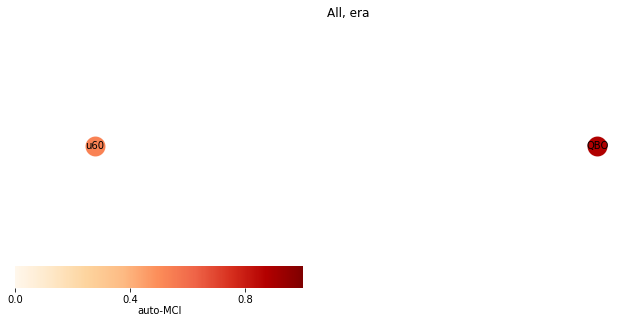

-----------------------------------------------------
CAM
['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 4 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.842
        (QBO -2): max_pval = 0.00010, min_val = 0.365
        (QBO -6): max_pval = 0.05160, min_val = 0.185
        (QBO -4): max_pval = 0.09947, min_val = 0.159

    Variable u60 has 2 parent(s):
        (u60 -1): max_pval = 0.00000, min_val = 0.424
        (u60 -3): max_pval = 0.15337, min_val = 0.136

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 4 link(s):
        (QBO -1): pval = 0.00000 | val = 0.840 | conf = (0.000, 0.000)

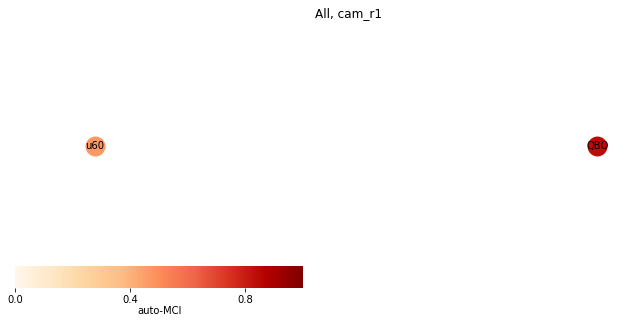

['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 4 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.863
        (QBO -2): max_pval = 0.00000, min_val = 0.448
        (QBO -5): max_pval = 0.00289, min_val = 0.284
        (QBO -3): max_pval = 0.17765, min_val = 0.131

    Variable u60 has 3 parent(s):
        (u60 -1): max_pval = 0.00006, min_val = 0.375
        (QBO -1): max_pval = 0.07006, min_val = 0.176
        (u60 -2): max_pval = 0.18178, min_val = 0.129

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 3 link(s):
        (QBO -1): pval = 0.00000 | val = 0.857 | conf = (0.000, 0.000)
   

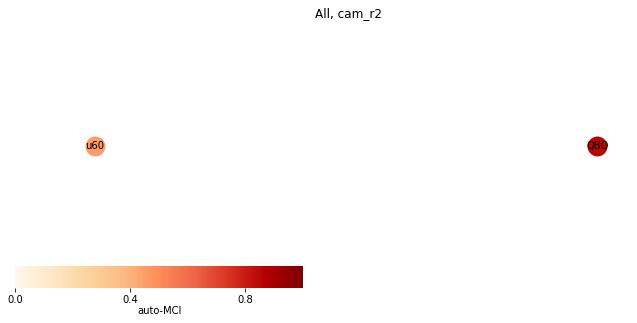

['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 4 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.825
        (QBO -2): max_pval = 0.00002, min_val = 0.400
        (QBO -5): max_pval = 0.06389, min_val = 0.179
        (QBO -6): max_pval = 0.18672, min_val = 0.126

    Variable u60 has 2 parent(s):
        (u60 -1): max_pval = 0.00000, min_val = 0.456
        (QBO -6): max_pval = 0.17123, min_val = 0.131

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 4 link(s):
        (QBO -1): pval = 0.00000 | val = 0.823 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00000 | val = -0.451 | conf = 

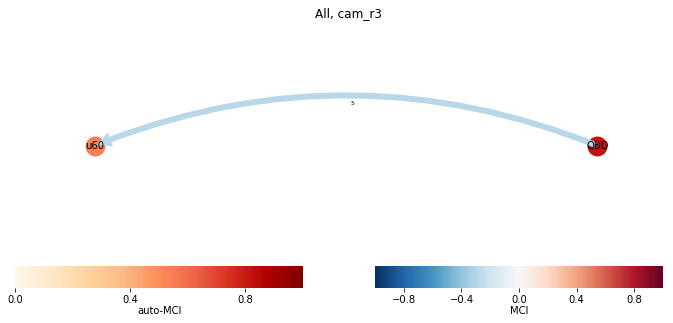

-----------------------------------------------------
CCCMA
['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 2 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.856
        (QBO -2): max_pval = 0.00003, min_val = 0.431

    Variable u60 has 2 parent(s):
        (u60 -2): max_pval = 0.10812, min_val = 0.171
        (u60 -5): max_pval = 0.16851, min_val = 0.146

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 3 link(s):
        (QBO -1): pval = 0.00000 | val = 0.856 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00000 | val = -0.552 | conf = (0.000, 0.000)
        (QBO -3): pval = 0.00005 

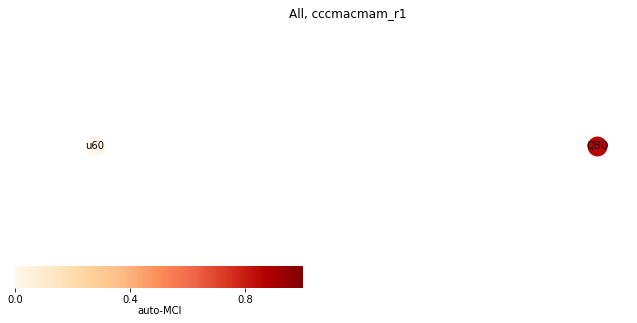

['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 3 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.809
        (QBO -2): max_pval = 0.01040, min_val = 0.272
        (QBO -4): max_pval = 0.06278, min_val = 0.197

    Variable u60 has 2 parent(s):
        (u60 -2): max_pval = 0.03853, min_val = 0.219
        (u60 -4): max_pval = 0.17791, min_val = 0.145

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 3 link(s):
        (QBO -1): pval = 0.00000 | val = 0.836 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00014 | val = -0.399 | conf = (0.000, 0.000)
        (QBO -3): pval = 0.00727 | val 

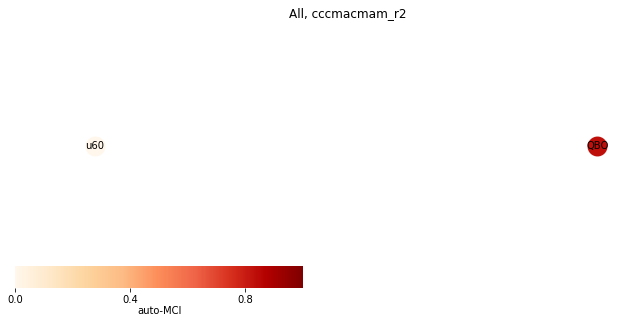

['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 2 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.866
        (QBO -2): max_pval = 0.00010, min_val = 0.403

    Variable u60 has 1 parent(s):
        (u60 -2): max_pval = 0.01029, min_val = 0.269

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 3 link(s):
        (QBO -1): pval = 0.00000 | val = 0.866 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00000 | val = -0.481 | conf = (0.000, 0.000)
        (QBO -3): pval = 0.00028 | val = 0.382 | conf = (0.000, 0.000)

    Variable u60 has 1 link(s):
        (u60 -2): pval = 0.01601 | val = -0

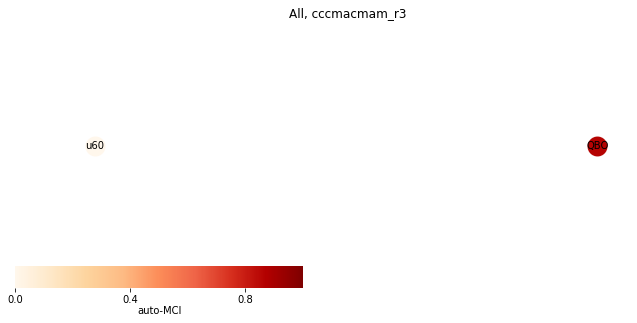

-----------------------------------------------------
ISAC
['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 5 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.896
        (QBO -2): max_pval = 0.00000, min_val = 0.552
        (QBO -3): max_pval = 0.01289, min_val = 0.267
        (u60 -6): max_pval = 0.09816, min_val = 0.175
        (u60 -1): max_pval = 0.13290, min_val = 0.162

    Variable u60 has 2 parent(s):
        (u60 -1): max_pval = 0.04564, min_val = 0.215
        (u60 -4): max_pval = 0.06270, min_val = 0.200

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 3 link(s):
        (QBO -1

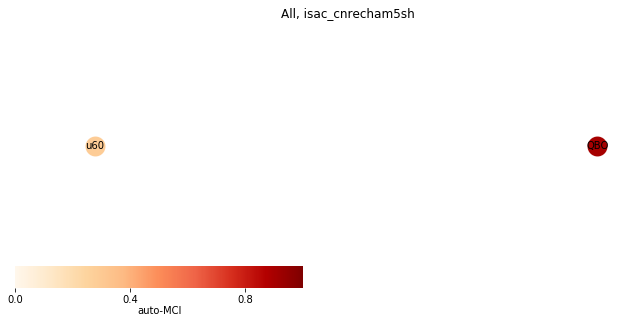

-----------------------------------------------------
MIROC AGCM
['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 4 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.820
        (QBO -2): max_pval = 0.00011, min_val = 0.402
        (QBO -6): max_pval = 0.00041, min_val = 0.371
        (QBO -5): max_pval = 0.10094, min_val = 0.174

    Variable u60 has 1 parent(s):
        (u60 -1): max_pval = 0.01768, min_val = 0.251

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 3 link(s):
        (QBO -1): pval = 0.00000 | val = 0.815 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00001 | val = -0.47

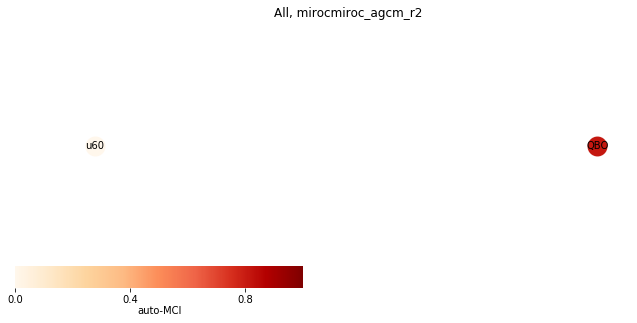

['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 4 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.884
        (QBO -2): max_pval = 0.00000, min_val = 0.592
        (QBO -6): max_pval = 0.00757, min_val = 0.285
        (QBO -5): max_pval = 0.16102, min_val = 0.152

    Variable u60 has 2 parent(s):
        (u60 -1): max_pval = 0.00143, min_val = 0.331
        (u60 -5): max_pval = 0.15079, min_val = 0.153

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 3 link(s):
        (QBO -1): pval = 0.00000 | val = 0.853 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00000 | val = -0.486 | conf = 

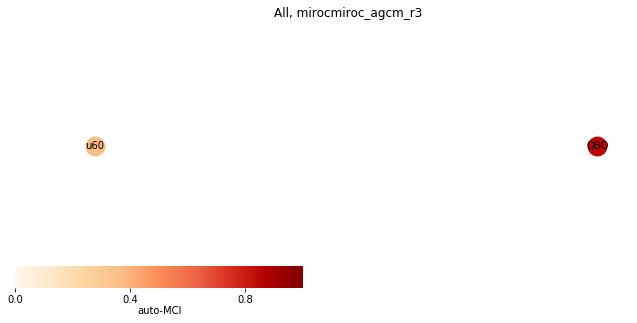

-----------------------------------------------------
MIROC ESM
['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 4 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.902
        (QBO -2): max_pval = 0.00000, min_val = 0.482
        (QBO -3): max_pval = 0.11514, min_val = 0.170
        (QBO -6): max_pval = 0.13772, min_val = 0.160

    Variable u60 has 4 parent(s):
        (u60 -3): max_pval = 0.03598, min_val = 0.224
        (u60 -4): max_pval = 0.06179, min_val = 0.199
        (u60 -1): max_pval = 0.07258, min_val = 0.195
        (QBO -1): max_pval = 0.17598, min_val = 0.147

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alp

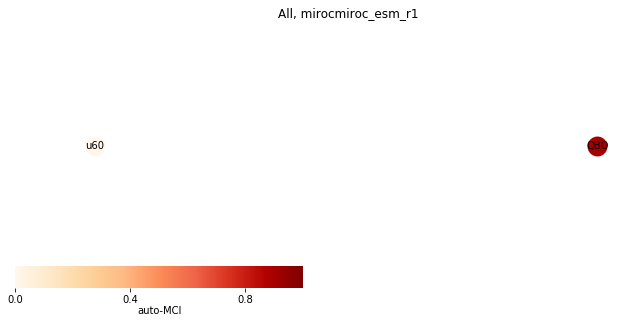

['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 2 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.766
        (QBO -2): max_pval = 0.01776, min_val = 0.255

    Variable u60 has 3 parent(s):
        (u60 -1): max_pval = 0.01656, min_val = 0.255
        (u60 -4): max_pval = 0.04776, min_val = 0.213
        (u60 -2): max_pval = 0.07377, min_val = 0.190

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 3 link(s):
        (QBO -1): pval = 0.00000 | val = 0.772 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00003 | val = -0.437 | conf = (0.000, 0.000)
        (QBO -3): pval = 0.00149 | val 

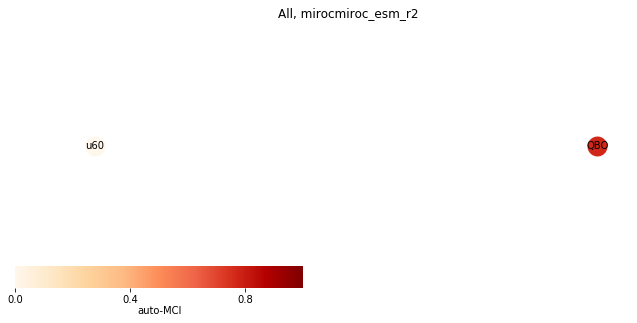

['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 4 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.850
        (QBO -2): max_pval = 0.00001, min_val = 0.459
        (QBO -6): max_pval = 0.07389, min_val = 0.190
        (QBO -3): max_pval = 0.14259, min_val = 0.158

    Variable u60 has 2 parent(s):
        (u60 -1): max_pval = 0.03443, min_val = 0.226
        (QBO -1): max_pval = 0.10069, min_val = 0.176

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 4 link(s):
        (QBO -1): pval = 0.00000 | val = 0.865 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00000 | val = -0.544 | conf = 

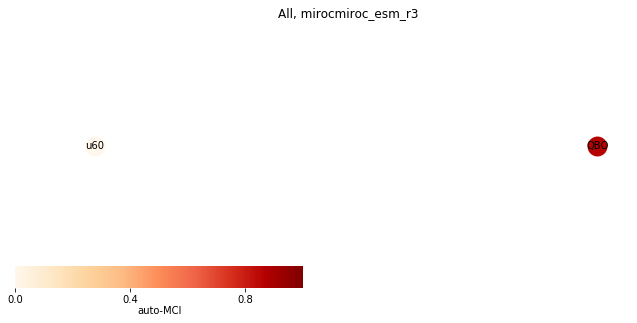

-----------------------------------------------------
MOHC
['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 2 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.853
        (QBO -2): max_pval = 0.00011, min_val = 0.403

    Variable u60 has 2 parent(s):
        (u60 -1): max_pval = 0.00002, min_val = 0.441
        (u60 -3): max_pval = 0.12797, min_val = 0.163

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 4 link(s):
        (QBO -1): pval = 0.00000 | val = 0.853 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00054 | val = -0.366 | conf = (0.000, 0.000)
        (QBO -4): pval = 0.04074 |

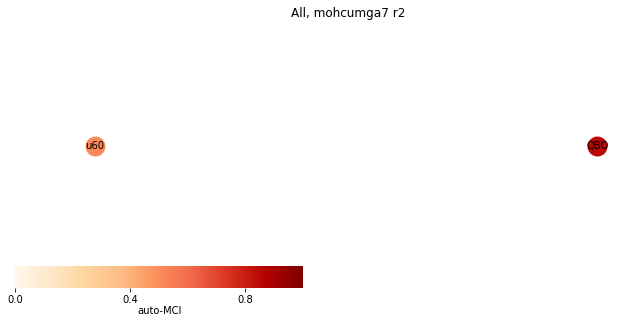

['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 3 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.856
        (QBO -2): max_pval = 0.02908, min_val = 0.234
        (QBO -6): max_pval = 0.10473, min_val = 0.175

    Variable u60 has 1 parent(s):
        (u60 -1): max_pval = 0.00040, min_val = 0.369

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 6 link(s):
        (QBO -1): pval = 0.00000 | val = 0.844 | conf = (0.000, 0.000)
        (u60 0): pval = 0.00258 | val = 0.323 | conf = (0.000, 0.000)
        (u60 -3): pval = 0.01362 | val = 0.267 | conf = (0.000, 0.000)
        (QBO -2): pval =

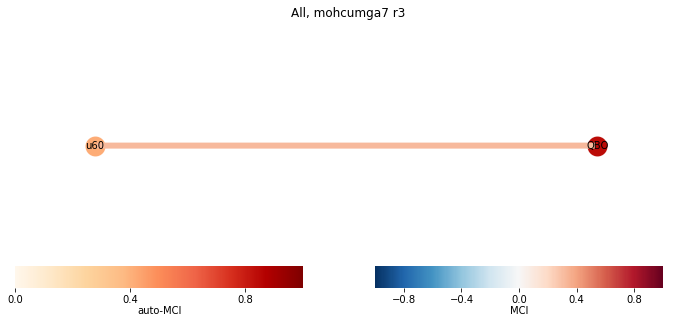

['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 3 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.826
        (QBO -2): max_pval = 0.00046, min_val = 0.367
        (u60 -3): max_pval = 0.10435, min_val = 0.173

    Variable u60 has 3 parent(s):
        (u60 -1): max_pval = 0.00001, min_val = 0.465
        (u60 -5): max_pval = 0.01448, min_val = 0.261
        (QBO -6): max_pval = 0.06657, min_val = 0.198

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 3 link(s):
        (QBO -1): pval = 0.00000 | val = 0.842 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00006 | val = -0.425 | conf = 

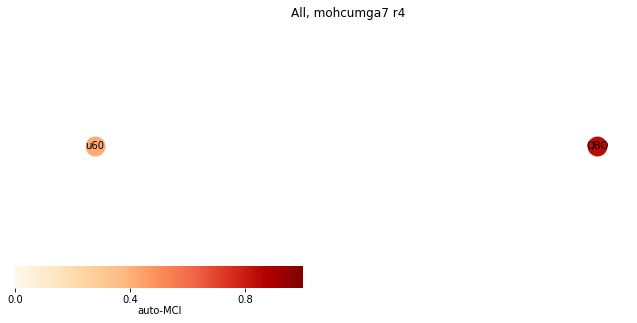

-----------------------------------------------------
MRI
['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 4 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.774
        (QBO -3): max_pval = 0.02996, min_val = 0.232
        (QBO -4): max_pval = 0.05909, min_val = 0.200
        (QBO -2): max_pval = 0.13595, min_val = 0.160

    Variable u60 has 1 parent(s):
        (u60 -1): max_pval = 0.00169, min_val = 0.328

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 6 link(s):
        (QBO -1): pval = 0.00000 | val = 0.795 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00008 | val = -0.415 | con

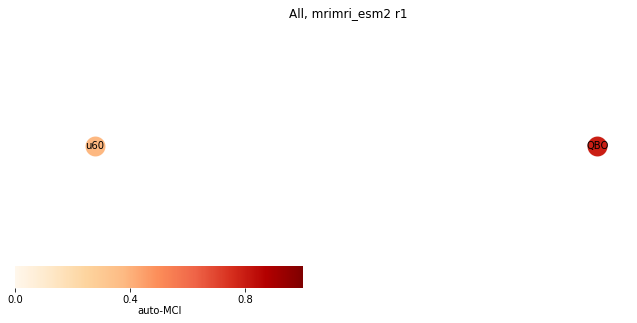

-----------------------------------------------------
WACCM
['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 4 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.842
        (QBO -2): max_pval = 0.00000, min_val = 0.437
        (QBO -3): max_pval = 0.02626, min_val = 0.221
        (u60 -5): max_pval = 0.14221, min_val = 0.146

    Variable u60 has 2 parent(s):
        (u60 -1): max_pval = 0.02132, min_val = 0.228
        (u60 -6): max_pval = 0.10032, min_val = 0.164

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 3 link(s):
        (QBO -1): pval = 0.00000 | val = 0.849 | conf = (0.000, 0.00

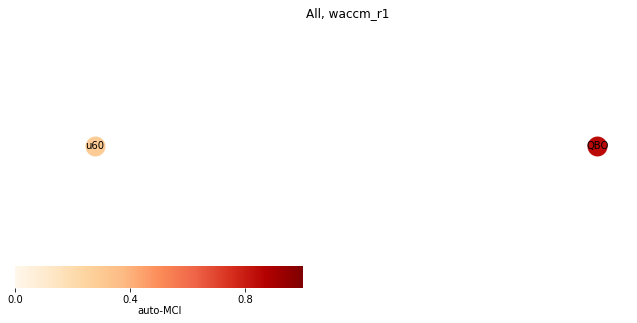

['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 3 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.846
        (QBO -2): max_pval = 0.00011, min_val = 0.375
        (QBO -6): max_pval = 0.12253, min_val = 0.155

    Variable u60 has 2 parent(s):
        (u60 -1): max_pval = 0.00083, min_val = 0.326
        (QBO -1): max_pval = 0.14892, min_val = 0.144

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 2 link(s):
        (QBO -1): pval = 0.00000 | val = 0.838 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00018 | val = -0.369 | conf = (0.000, 0.000)

    Variable u60 has 1 link(s):
      

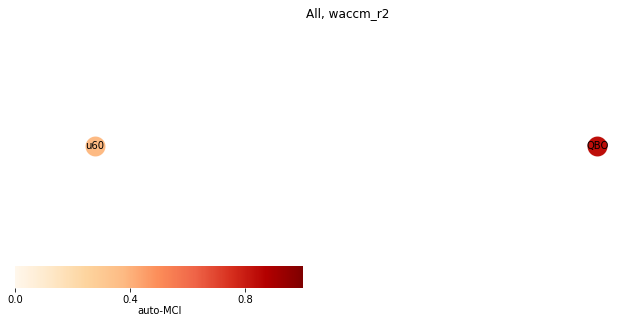

['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 4 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.832
        (QBO -2): max_pval = 0.00033, min_val = 0.350
        (QBO -3): max_pval = 0.11282, min_val = 0.159
        (QBO -6): max_pval = 0.13010, min_val = 0.152

    Variable u60 has 1 parent(s):
        (u60 -1): max_pval = 0.00008, min_val = 0.380

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 2 link(s):
        (QBO -1): pval = 0.00000 | val = 0.818 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00020 | val = -0.369 | conf = (0.000, 0.000)

    Variable u60 has 2 link(s):
      

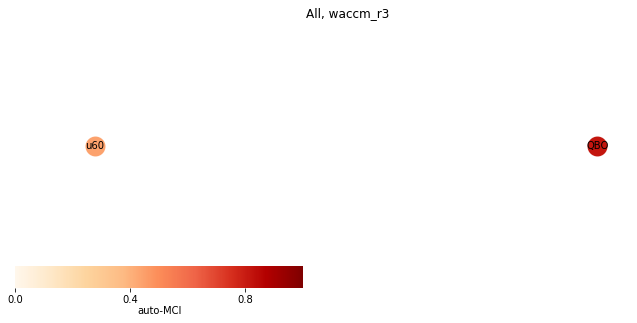

-----------------------------------------------------
YONSEI A
['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 3 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.860
        (QBO -2): max_pval = 0.00003, min_val = 0.451
        (QBO -3): max_pval = 0.10991, min_val = 0.181

    Variable u60 has 5 parent(s):
        (u60 -1): max_pval = 0.00300, min_val = 0.330
        (u60 -3): max_pval = 0.00865, min_val = 0.292
        (QBO -6): max_pval = 0.01629, min_val = 0.272
        (u60 -2): max_pval = 0.01842, min_val = 0.261
        (QBO -5): max_pval = 0.08161, min_val = 0.200

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alph

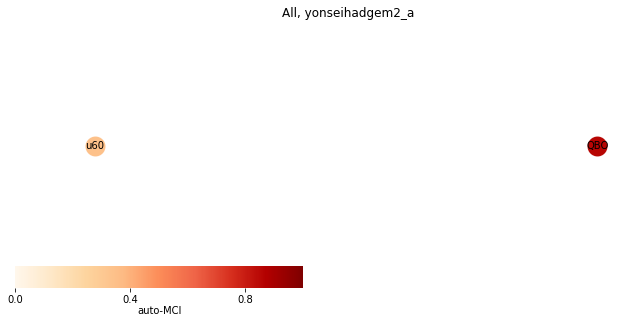

-----------------------------------------------------
YONSEI AC
['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 6
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 2 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.844
        (QBO -2): max_pval = 0.00331, min_val = 0.327

    Variable u60 has 2 parent(s):
        (u60 -1): max_pval = 0.00139, min_val = 0.349
        (u60 -6): max_pval = 0.14551, min_val = 0.163

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 6
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 3 link(s):
        (QBO -1): pval = 0.00000 | val = 0.844 | conf = (0.000, 0.000)
        (u60 0): pval = 0.01036 | val = 0.291 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.0158

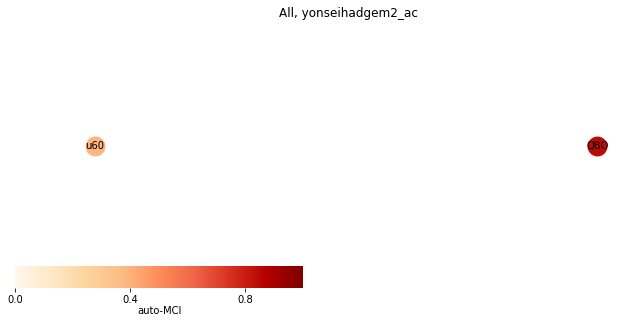

In [86]:
#=========================================================================================
save_plot=False #True # set to True/False to save the plots to drive folder
# All available variable names:
# var_names=['NAO','BK-tas','EA-tas','PoV','Sib-SLP','Ural-SLP','v_flux','NAO','QBO','u60']
var_select=['NAO','BK-SIC','EA-tas','PoV','Sib-SLP','Ural-SLP','v_flux']
var_select=['QBO','u60'] #,'NAO']
#=========================================================================================
save_plot=False #True # set to True/False to save the plots to drive folder

print("-----------------------------------------------------")
print("ERA")
plot_model(era_noqbo,era_noqbo_mask,era_qboe_mask,era_qbow_mask,
           var_select=var_select,save_plot=save_plot,save_name="era", title="era",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
print("-----------------------------------------------------")
print("CAM")
plot_model(cam_noqbo_r1,cam_noqbo_mask_r1,cam_qboe_mask_r1,cam_qbow_mask_r1,
           var_select=var_select,save_plot=save_plot,save_name="cam_r1", title="cam_r1",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
plot_model(cam_noqbo_r2,cam_noqbo_mask_r2,cam_qboe_mask_r2,cam_qbow_mask_r2,
           var_select=var_select,save_plot=save_plot,save_name="cam_r2", title="cam_r2",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
plot_model(cam_noqbo_r3,cam_noqbo_mask_r3,cam_qboe_mask_r3,cam_qbow_mask_r3,
           var_select=var_select,save_plot=save_plot,save_name="cam_r3", title="cam_r3",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
print("-----------------------------------------------------")
print("CCCMA")
plot_model(cccmacmam_noqbo_r1,cccmacmam_noqbo_mask_r1,cccmacmam_qboe_mask_r1,cccmacmam_qbow_mask_r1,
           var_select=var_select,save_plot=save_plot,save_name="cccmacmam_r1",title="cccmacmam_r1",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
plot_model(cccmacmam_noqbo_r2,cccmacmam_noqbo_mask_r2,cccmacmam_qboe_mask_r2,cccmacmam_qbow_mask_r2,
           var_select=var_select,save_plot=save_plot,save_name="cccmacmam_r2",title="cccmacmam_r2",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
plot_model(cccmacmam_noqbo_r3,cccmacmam_noqbo_mask_r3,cccmacmam_qboe_mask_r3,cccmacmam_qbow_mask_r3,
           var_select=var_select,save_plot=save_plot,save_name="cccmacmam_r3",title="cccmacmam_r3",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
print("-----------------------------------------------------")
print("ISAC")
plot_model(isac_cnrecham5sh_noqbo,isac_cnrecham5sh_noqbo_mask,isac_cnrecham5sh_qboe_mask,isac_cnrecham5sh_qbow_mask,
           var_select=var_select,save_plot=save_plot,save_name="isac_cnrecham5sh",title="isac_cnrecham5sh",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
print("-----------------------------------------------------")
print("MIROC AGCM")
plot_model(mirocmiroc_agcm_noqbo_r2,mirocmiroc_agcm_noqbo_mask_r2,mirocmiroc_agcm_qboe_mask_r2,mirocmiroc_agcm_qbow_mask_r2,
           var_select=var_select,save_plot=save_plot,save_name="mirocmiroc_agcm_r2",title="mirocmiroc_agcm_r2",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
plot_model(mirocmiroc_agcm_noqbo_r3,mirocmiroc_agcm_noqbo_mask_r3,mirocmiroc_agcm_qboe_mask_r3,mirocmiroc_agcm_qbow_mask_r3,
           var_select=var_select,save_plot=save_plot,save_name="mirocmiroc_agcm_r3",title="mirocmiroc_agcm_r3",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
print("-----------------------------------------------------")
print("MIROC ESM")
plot_model(mirocmiroc_esm_noqbo_r1,mirocmiroc_esm_noqbo_mask_r1,mirocmiroc_esm_qboe_mask_r1,mirocmiroc_esm_qbow_mask_r1,
           var_select=var_select,save_plot=save_plot,save_name="mirocmiroc_esm_r1",title="mirocmiroc_esm_r1",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
plot_model(mirocmiroc_esm_noqbo_r2,mirocmiroc_esm_noqbo_mask_r2,mirocmiroc_esm_qboe_mask_r2,mirocmiroc_esm_qbow_mask_r2,
           var_select=var_select,save_plot=save_plot,save_name="mirocmiroc_esm_r2",title="mirocmiroc_esm_r2",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
plot_model(mirocmiroc_esm_noqbo_r3,mirocmiroc_esm_noqbo_mask_r3,mirocmiroc_esm_qboe_mask_r3,mirocmiroc_esm_qbow_mask_r3,
           var_select=var_select,save_plot=save_plot,save_name="mirocmiroc_esm_r3",title="mirocmiroc_esm_r3",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
print("-----------------------------------------------------")
print("MOHC")
plot_model(mohcumga7_noqbo_r2,mohcumga7_noqbo_mask_r2,mohcumga7_qboe_mask_r2,mohcumga7_qbow_mask_r2,
           var_select=var_select,save_plot=save_plot,save_name="mohcumga7 r2",title="mohcumga7 r2",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
plot_model(mohcumga7_noqbo_r3,mohcumga7_noqbo_mask_r3,mohcumga7_qboe_mask_r3,mohcumga7_qbow_mask_r3,
           var_select=var_select,save_plot=save_plot,save_name="mohcumga7 r3",title="mohcumga7 r3",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
plot_model(mohcumga7_noqbo_r4,mohcumga7_noqbo_mask_r4,mohcumga7_qboe_mask_r4,mohcumga7_qbow_mask_r4,
           var_select=var_select,save_plot=save_plot,save_name="mohcumga7 r4",title="mohcumga7 r4",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
print("-----------------------------------------------------")
print("MRI")
plot_model(mrimri_esm2_noqbo_r1,mrimri_esm2_noqbo_mask_r1,mrimri_esm2_qboe_mask_r1,mrimri_esm2_qbow_mask_r1,
           var_select=var_select,save_plot=save_plot,save_name="mrimri_esm2 r1",title="mrimri_esm2 r1",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
print("-----------------------------------------------------")
print("WACCM")
plot_model(waccm_noqbo_r1,waccm_noqbo_mask_r1,waccm_qboe_mask_r1,waccm_qbow_mask_r1,
           var_select=var_select,save_plot=save_plot,save_name="waccm_r1", title="waccm_r1",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
plot_model(waccm_noqbo_r2,waccm_noqbo_mask_r2,waccm_qboe_mask_r2,waccm_qbow_mask_r2,
           var_select=var_select,save_plot=save_plot,save_name="waccm_r2", title="waccm_r2",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
plot_model(waccm_noqbo_r3,waccm_noqbo_mask_r3,waccm_qboe_mask_r3,waccm_qbow_mask_r3,
           var_select=var_select,save_plot=save_plot,save_name="waccm_r3", title="waccm_r3",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
print("-----------------------------------------------------")
print("YONSEI A")
plot_model(yonseihadgem2_a_noqbo,yonseihadgem2_a_noqbo_mask,yonseihadgem2_a_qboe_mask,yonseihadgem2_a_qbow_mask,
           var_select=var_select,save_plot=save_plot,save_name="yonseihadgem2_a",title="yonseihadgem2_a",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)
print("-----------------------------------------------------")
print("YONSEI AC")
plot_model(yonseihadgem2_ac_noqbo,yonseihadgem2_ac_noqbo_mask,yonseihadgem2_ac_qboe_mask,yonseihadgem2_ac_qbow_mask,
           var_select=var_select,save_plot=save_plot,save_name="yonseihadgem2_ac",title="yonseihadgem2_ac",pc_alpha=pc_alpha,
                 alpha_level=alpha_level,tau_min=tau_min,tau_max=tau_max)

# Ensemble mean plots


The code  below calculates the link matrices for all models, then combines them. You can change the models used by changing the "mods" list. Change the actors used by changing the var_select list. Rerun the two cells below to see the changes.



In [7]:
# Function for ensemble plots


def run_and_plot_prepare_ensemble(dataframe, cond_ind_test, var_select, tau_max,
                                  tau_min, pc_alpha=0.1, alpha_level=0.05):
    """
    small function from example notebook to calc pcmci and plot masked links
    
    """
    pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test) #, var_names=var_select)
    results = pcmci.run_pcmci(tau_min=tau_min,tau_max=tau_max,pc_alpha=pc_alpha)
    link_matrix = pcmci.return_significant_parents(pq_matrix=results['p_matrix'],
            val_matrix=results['val_matrix'], alpha_level=alpha_level)['link_matrix']
# #     tp.plot_graph(fig_ax = fig_ax,  val_matrix=results['val_matrix'],
# #                   link_matrix=link_matrix, var_names=var_select,
#     )
    return results, link_matrix




In [90]:
##### WORKING QBOE/W MASK
### 
mods = [cam_anom_r1,cam_anom_r2,cam_anom_r3,
        cccmacmam_anom_r1,cccmacmam_anom_r2,cccmacmam_anom_r3,
        isac_cnrecham5sh_anom,
        mirocmiroc_agcm_anom_r2,mirocmiroc_agcm_anom_r3,
        mirocmiroc_esm_anom_r1, mirocmiroc_esm_anom_r2, mirocmiroc_esm_anom_r3,
        mohcumga7_anom_r2,mohcumga7_anom_r3,mohcumga7_anom_r4,
        mrimri_esm2_anom_r1,
        waccm_anom_r1,waccm_anom_r2,waccm_anom_r3,
        yonseihadgem2_a_anom,yonseihadgem2_ac_anom]

        
qemask = [cam_qboe_mask_r1,cam_qboe_mask_r2,cam_qboe_mask_r3,
        cccmacmam_qboe_mask_r1,cccmacmam_qboe_mask_r2,cccmacmam_qboe_mask_r3,
        isac_cnrecham5sh_qboe_mask,
        mirocmiroc_agcm_qboe_mask_r2,mirocmiroc_agcm_qboe_mask_r3,
        mirocmiroc_esm_qboe_mask_r1, mirocmiroc_esm_qboe_mask_r2, mirocmiroc_esm_qboe_mask_r3,
        mohcumga7_qboe_mask_r2,mohcumga7_qboe_mask_r3,mohcumga7_qboe_mask_r4,
        mrimri_esm2_qboe_mask_r1,
        waccm_qboe_mask_r1,waccm_qboe_mask_r2,waccm_qboe_mask_r3,
        yonseihadgem2_a_qboe_mask,yonseihadgem2_ac_qboe_mask]

qwmask = [cam_qbow_mask_r1,cam_qbow_mask_r2,cam_qbow_mask_r3,
        cccmacmam_qbow_mask_r1,cccmacmam_qbow_mask_r2,cccmacmam_qbow_mask_r3,
        isac_cnrecham5sh_qbow_mask,
        mirocmiroc_agcm_qbow_mask_r2,mirocmiroc_agcm_qbow_mask_r3,
        mirocmiroc_esm_qbow_mask_r1, mirocmiroc_esm_qbow_mask_r2, mirocmiroc_esm_qbow_mask_r3,
        mohcumga7_qbow_mask_r2,mohcumga7_qbow_mask_r3,mohcumga7_qbow_mask_r4,
        mrimri_esm2_qbow_mask_r1,
        waccm_qbow_mask_r1,waccm_qbow_mask_r2,waccm_qbow_mask_r3,
        yonseihadgem2_a_qbow_mask,yonseihadgem2_ac_qbow_mask]
monmask = [cam_noqbo_mask_r1,cam_noqbo_mask_r2,cam_noqbo_mask_r3,
        cccmacmam_noqbo_mask_r1,cccmacmam_noqbo_mask_r2,cccmacmam_noqbo_mask_r3,
        isac_cnrecham5sh_noqbo_mask,
        mirocmiroc_agcm_noqbo_mask_r2,mirocmiroc_agcm_noqbo_mask_r3,
        mirocmiroc_esm_noqbo_mask_r1, mirocmiroc_esm_noqbo_mask_r2, mirocmiroc_esm_noqbo_mask_r3,
        mohcumga7_noqbo_mask_r2,mohcumga7_noqbo_mask_r3,mohcumga7_noqbo_mask_r4,
        mrimri_esm2_noqbo_mask_r1,
        waccm_noqbo_mask_r1,waccm_noqbo_mask_r2,waccm_noqbo_mask_r3,
        yonseihadgem2_a_noqbo_mask,yonseihadgem2_ac_noqbo_mask]

#===============================================================================================================
# var_select=['EA-tas','BK-tas','Sib-SLP','Ural-SLP'] #,'EA-tas']
#var_select=['QBO','NAO','BK-SIC','EA-tas','PoV','Ural-SLP'] # ['BK-tas','EA-tas','PoV','v_flux','Sib-SLP']
#var_select=['NAO','PoV','BK-SIC']
var_select=['QBO','u60'] #,'v_flux']

current_var = "_".join(var_select)
print("Current variables: {}".format(current_var))

# Change these variables
tau_max = 3         # Maximum lag
tau_min = 0         # Minimum lag
robust_thres = 0.6   #Only show links that are significant in that fraction of models
pc_alpha = 0.4     # Sig. threshold in the condition selection step
alpha_level = 0.5
#===============================================================================================================

n_models = len(mods)
n_cols = len(var_select)

link_matrices_all = numpy.zeros((n_models, n_cols, n_cols, tau_max + 1))
average_vals_all = numpy.zeros((n_models, n_cols, n_cols, tau_max + 1))
link_matrices_qe = numpy.zeros((n_models, n_cols, n_cols, tau_max + 1))
average_vals_qe = numpy.zeros((n_models, n_cols, n_cols, tau_max + 1))
link_matrices_qw = numpy.zeros((n_models, n_cols, n_cols, tau_max + 1))
average_vals_qw = numpy.zeros((n_models, n_cols, n_cols, tau_max + 1))

for i in range(n_models):
#    print(i)
    # Initialize dataframe object
    data = mods[i].as_matrix(columns=var_select)
    
    df_all = pp.DataFrame(data,mask=monmask[i][:,0:n_cols])
    df_qbow = pp.DataFrame(data, mask=qwmask[i][:,0:n_cols])
    df_qboe = pp.DataFrame(data, mask=qemask[i][:,0:n_cols])
    
#    print('results all')
    results_all, link_matrix_all = run_and_plot_prepare_ensemble(df_all, 
                                      ParCorr(significance='analytic',mask_type='y'),
                                      var_select=var_select, tau_max=tau_max,
                                      tau_min=tau_min,pc_alpha=pc_alpha,alpha_level=alpha_level)
#    print('results qboe')
    results_qboe, link_matrix_qboe = run_and_plot_prepare_ensemble(df_qboe,
                                      ParCorr(significance='analytic',mask_type='y'),
                                      var_select=var_select, tau_max=tau_max,
                                      tau_min=tau_min,pc_alpha=pc_alpha,alpha_level=alpha_level)
    results_qbow, link_matrix_qbow = run_and_plot_prepare_ensemble(df_qbow,
                                      ParCorr(significance='analytic',mask_type='y'),
                                      var_select=var_select, tau_max=tau_max,
                                      tau_min=tau_min,pc_alpha=pc_alpha,alpha_level=alpha_level)

    link_matrices_all[i] = link_matrix_all
    average_vals_all[i] = results_all['val_matrix']
    link_matrices_qw[i] = link_matrix_qbow
    average_vals_qw[i] = results_qbow['val_matrix']
    link_matrices_qe[i] = link_matrix_qboe
    average_vals_qe[i] = results_qboe['val_matrix']

#print("ALL YEARS")
link_color_matrix_all = average_vals_all.mean(axis=0)
link_width_all = link_matrices_all.mean(axis=0)
link_matrix_all = link_width_all > robust_thres

#print("QBOW YEARS")
link_color_matrix_qw = average_vals_qw.mean(axis=0)
link_width_qw = link_matrices_qw.mean(axis=0)
link_matrix_qw = link_width_qw > robust_thres

#print("QBOE YEARS")
link_color_matrix_qe = average_vals_qe.mean(axis=0)
link_width_qe = link_matrices_qe.mean(axis=0)
link_matrix_qe = link_width_qe > robust_thres

## PLOT ENSEMBLE PLOTS
# FIGURE PROPERTIES
savefig = False #True # False # Save figures in the google drive, True or False

vmax_edges=0.7; vmin_edges=-0.7
vmax_nodes=0.7; vmin_nodes=0.0
edge_ticks=0.2; node_ticks=0.2
cmap_nodes='YlOrBr'; cmap_edges='RdBu_r'

Current variables: QBO_u60


['QBO', 'u60']
All years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = [0.4]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 3 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.882
        (QBO -2): max_pval = 0.00000, min_val = 0.486
        (QBO -3): max_pval = 0.17248, min_val = 0.135

    Variable u60 has 2 parent(s):
        (u60 -1): max_pval = 0.00050, min_val = 0.335
        (u60 -2): max_pval = 0.17078, min_val = 0.134

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 3
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 2 link(s):
        (QBO -1): pval = 0.00000 | val = 0.875 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00001 | val = -0.432 | conf = (0.000, 0.000)

    Variable u60 has 2 link(s):
      

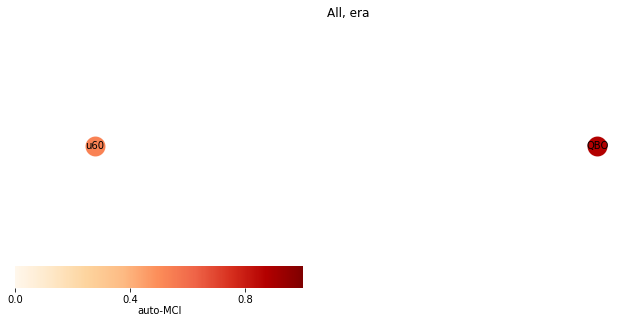

QBOE years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = [0.4]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 2 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.689
        (QBO -2): max_pval = 0.09376, min_val = 0.250

    Variable u60 has 2 parent(s):
        (u60 -1): max_pval = 0.00463, min_val = 0.415
        (QBO -3): max_pval = 0.25372, min_val = 0.176

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 3
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 2 link(s):
        (QBO -1): pval = 0.00000 | val = 0.864 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.01673 | val = -0.363 | conf = (0.000, 0.000)

    Variable u60 has 2 link(s):
        (u60 -1): pval = 0.00055 | val = 0.505 | conf = (0.000, 0.000)
   

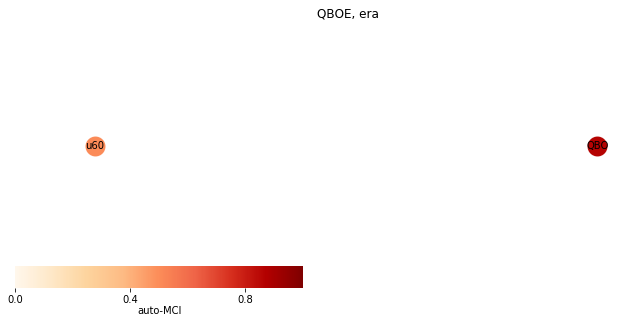

QBOW years

##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = [0.4]
max_conds_dim = None
max_combinations = 1



## Variable QBO

## Variable u60

## Resulting condition sets:

    Variable QBO has 3 parent(s):
        (QBO -1): max_pval = 0.00000, min_val = 0.855
        (QBO -2): max_pval = 0.00004, min_val = 0.561
        (QBO -3): max_pval = 0.08561, min_val = 0.253

    Variable u60 has 3 parent(s):
        (u60 -3): max_pval = 0.02113, min_val = 0.330
        (u60 -1): max_pval = 0.31020, min_val = 0.153
        (u60 -2): max_pval = 0.39170, min_val = 0.129

##
## Running Tigramite MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 3
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable QBO has 3 link(s):
        (QBO -1): pval = 0.00000 | val = 0.891 | conf = (0.000, 0.000)
        (QBO -2): pval = 0.00002 | val = -0.590 | conf = (0.000, 0.000)

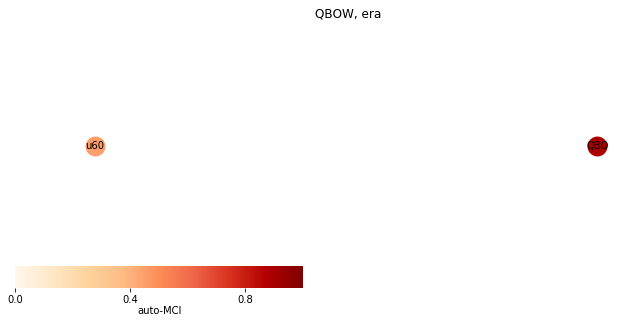

ALL YEARS


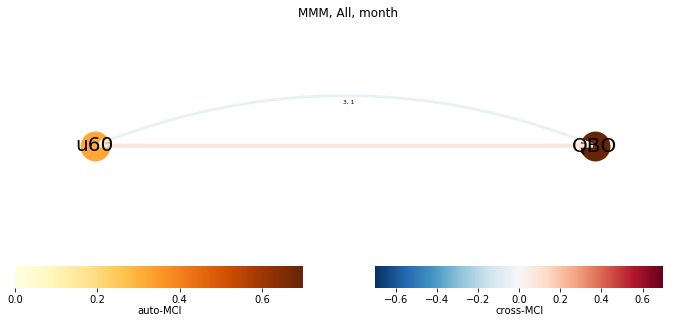

QBOW YEARS


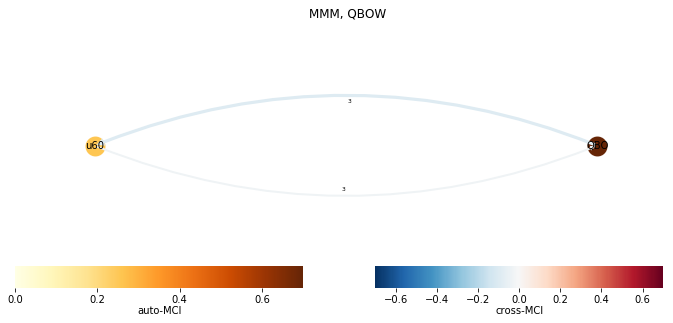

QBOE YEARS


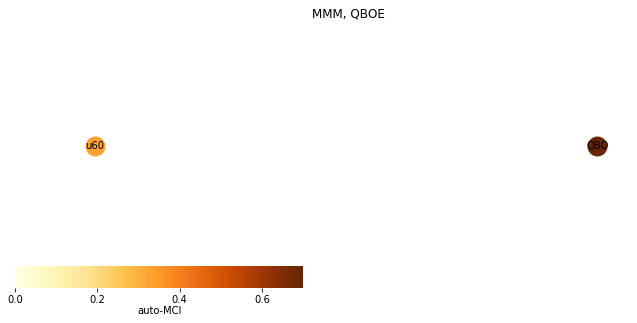

QBOE - QBOW


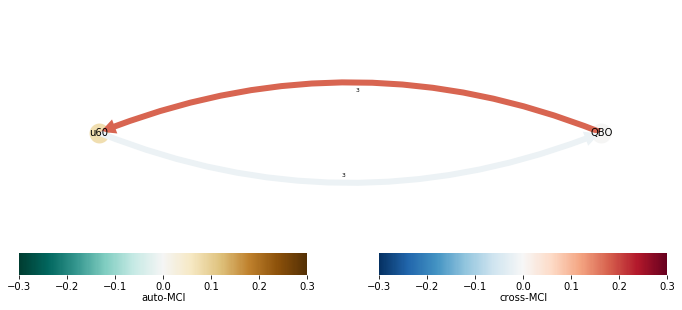

In [91]:

plot_model(era_noqbo,era_noqbo_mask,era_qboe_mask,era_qbow_mask,
           var_select=var_select,save_plot=False,save_name="era", title="era",pc_alpha=pc_alpha,
                 alpha_level=0.05,tau_min=tau_min,tau_max=tau_max,show_qbo=True)

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111,frameon=False)
plt.title("MMM, All, month")
print("ALL YEARS")
tp.plot_graph(
    val_matrix=link_color_matrix_all,
    fig_ax=(fig,ax),
    link_matrix=link_matrix_all,
    var_names=var_select,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    link_width=link_width_all,
    vmax_edges=vmax_edges, vmin_edges=vmin_edges,
    edge_ticks=edge_ticks, node_ticks=node_ticks,
    vmax_nodes=vmax_nodes, vmin_nodes=vmin_nodes,
    cmap_nodes=cmap_nodes, cmap_edges=cmap_edges,
    node_size=30, node_label_size=20,
    arrowhead_size=20, arrow_linewidth=30,
    show_colorbar=True
    )

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111,frameon=False)
plt.title("MMM, QBOW")
print("QBOW YEARS")
tp.plot_graph(
    val_matrix=link_color_matrix_qw,
    fig_ax=(fig,ax),
    link_matrix=link_matrix_qw,
    var_names=var_select,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    link_width=link_width_qe,
    vmax_edges=vmax_edges,
    vmin_edges=vmin_edges,
    edge_ticks=edge_ticks,
    node_ticks=node_ticks,
    vmax_nodes=vmax_nodes,
    vmin_nodes=vmin_nodes,
    cmap_nodes=cmap_nodes,
    cmap_edges=cmap_edges
    )
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111,frameon=False)
plt.title("MMM, QBOE")
print("QBOE YEARS")
tp.plot_graph(
    val_matrix=link_color_matrix_qe,
    fig_ax=(fig,ax),
    link_matrix=link_matrix_qe,
    var_names=var_select,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    link_width=link_width_qe,
    vmax_edges=vmax_edges,
    vmin_edges=vmin_edges,
    edge_ticks=edge_ticks,
    node_ticks=node_ticks,
    vmax_nodes=vmax_nodes,
    vmin_nodes=vmin_nodes,
    cmap_nodes=cmap_nodes,
    cmap_edges=cmap_edges
    )

## PLOT ENSEMBLE PLOTS for difference between QBOE-QBOW
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111,frameon=False)

link_color_matrix_diff = link_color_matrix_qe - link_color_matrix_qw
link_matrix_diff = link_matrix_qe ^ link_matrix_qw
link_width_diff = np.abs(link_width_qe - link_width_qw)

fig = plt.figure(1,figsize=(10,5))
ax = plt.subplot(111,frameon=False)
print("QBOE - QBOW")
tp.plot_graph(
    val_matrix=link_color_matrix_diff,
    fig_ax=(fig,ax),
    link_matrix=link_matrix_diff,
    var_names=var_select,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmax_edges=0.3,
    vmin_edges=-0.3,
    edge_ticks=0.1,
    node_ticks=0.1,
    vmax_nodes=0.3,
    vmin_nodes=-0.3,
    cmap_nodes='BrBG_r',
    cmap_edges='RdBu_r'
    )

if savefig:
    plt.savefig('modens_mon_{}.png'.format(current_var), bbox_inches='tight')

# Testing out some ideas


[[1.         0.65934257]
 [0.65934257 1.        ]]
[[ 1.         -0.00246824]
 [-0.00246824  1.        ]]


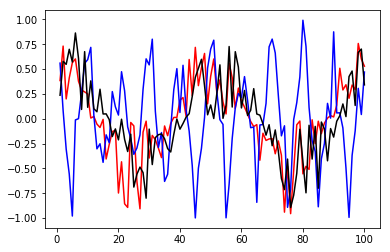

In [87]:
T = 1000
eta_x = np.random.rand(T)
eta_y = np.random.rand(T)
eta_z = np.random.rand(T)

t = np.linspace(1,T,T)
X = np.cos(2*np.pi*t/(50)) * eta_x
Y = np.cos(2*np.pi*t/(10)) * eta_y
Z = np.cos(2*np.pi*(t-4)/(50))*eta_z # + np.cos(2*np.pi*(t+3)/(10))*eta_z
#Z = X*eta_z # + np.cos(2*np.pi*(t+3)/(10))*eta_z
print(np.corrcoef(Z,X))
print(np.corrcoef(Z,Y))
#Z = 0.6*X 

plt.plot(t[0:100],X[0:100],'r')
plt.plot(t[0:100],Y[0:100],'b')
plt.plot(t[0:100],Z[0:100],'k')

In [63]:
data = np.array([X,Y,Z]).T
data.shape
var_names = ['X','Y','Z']

In [64]:
dataframe = pp.DataFrame(data=data)

In [65]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    var_names=var_names,
    verbosity=1)


## Estimating lagged dependencies


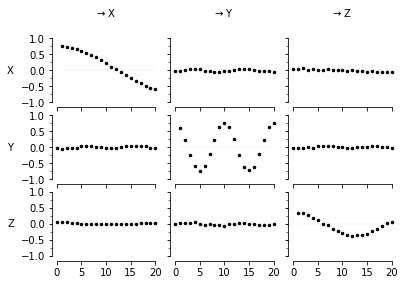

In [66]:
correlations = pcmci.get_lagged_dependencies(tau_max=20)
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5})

In [67]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None)


##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Variable X

## Variable Y

## Variable Z

## Resulting condition sets:

    Variable X has 6 parent(s):
    [pc_alpha = 0.3]
        (X -1): max_pval = 0.00000, min_val = 0.346
        (X -2): max_pval = 0.00000, min_val = 0.258
        (X -3): max_pval = 0.00000, min_val = 0.157
        (X -4): max_pval = 0.07462, min_val = 0.057
        (X -8): max_pval = 0.09944, min_val = 0.053
        (Y -5): max_pval = 0.25924, min_val = 0.036

    Variable Y has 10 parent(s):
    [pc_alpha = 0.5]
        (Y -5): max_pval = 0.00000, min_val = 0.307
        (Y -4): max_pval = 0.00000, min_val = 0.223
        (Y -6): max_pval = 0.00000, min_val = 0.218
        (Y -1): max_pval = 0.00000, min_val = 0.164
        (Y -3): max_pval = 0.00773, min_val = 0.085
        (Y -8): max_pval = 0.37661, min_val = 0.02

In [68]:
print("p-values")
print (results['p_matrix'].round(3))
print("MCI partial correlations")
print (results['val_matrix'].round(2))

p-values
[[[1.    0.    0.    0.    0.    0.    0.102 0.    0.011]
  [1.    0.077 0.615 0.838 0.334 0.376 0.197 0.092 0.968]
  [1.    0.546 0.004 0.048 0.273 0.18  0.414 0.338 0.908]]

 [[1.    0.855 0.917 0.752 0.098 0.059 0.325 0.463 0.856]
  [1.    0.    0.023 0.001 0.    0.    0.001 0.242 0.229]
  [1.    0.797 0.4   0.141 0.24  0.833 0.777 0.323 0.338]]

 [[1.    0.427 0.103 0.961 0.46  0.32  0.354 0.768 0.657]
  [1.    0.316 0.369 0.279 0.128 0.284 0.103 0.353 0.442]
  [1.    0.    0.    0.001 0.255 0.138 0.143 0.463 0.095]]]
MCI partial correlations
[[[ 0.    0.32  0.25  0.18  0.12  0.12  0.05  0.13  0.08]
  [ 0.   -0.06 -0.02  0.01  0.03  0.03 -0.04  0.05 -0.  ]
  [ 0.    0.02  0.09 -0.06 -0.04 -0.04 -0.03  0.03 -0.  ]]

 [[ 0.   -0.01  0.    0.01 -0.05  0.06  0.03 -0.02  0.01]
  [ 0.    0.15  0.07 -0.11 -0.15 -0.18 -0.1  -0.04  0.04]
  [ 0.    0.01 -0.03  0.05 -0.04  0.01  0.01  0.03  0.03]]

 [[ 0.    0.03  0.05  0.   -0.02 -0.03 -0.03  0.01 -0.01]
  [ 0.    0.03 -0.03  0.03  

In [69]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable X has 6 link(s):
        (X -1): pval = 0.00000 | qval = 0.00000 | val = 0.319
        (X -2): pval = 0.00000 | qval = 0.00000 | val = 0.249
        (X -3): pval = 0.00000 | qval = 0.00000 | val = 0.179
        (X -7): pval = 0.00005 | qval = 0.00039 | val = 0.130
        (X -5): pval = 0.00013 | qval = 0.00095 | val = 0.122
        (X -4): pval = 0.00027 | qval = 0.00175 | val = 0.117

    Variable Y has 5 link(s):
        (Y -5): pval = 0.00000 | qval = 0.00000 | val = -0.178
        (Y -1): pval = 0.00000 | qval = 0.00002 | val = 0.151
        (Y -4): pval = 0.00000 | qval = 0.00003 | val = -0.149
        (Y -3): pval = 0.00081 | qval = 0.00483 | val = -0.107
        (Y -6): pval = 0.00137 | qval = 0.00703 | val = -0.103

    Variable Z has 3 link(s):
        (Z -2): pval = 0.00000 | qval = 0.00000 | val = 0.202
        (Z -1): pval = 0.00000 | qval = 0.00000 | val = 0.176
        (Z -3): pval = 0.00106 | qval = 0.00585 | val = 0.

In [70]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

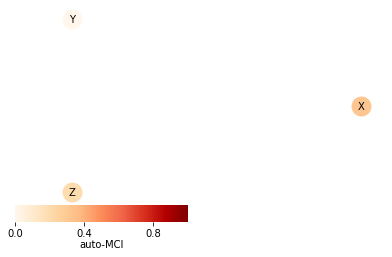

In [71]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    )